In [13]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [48]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.tree import plot_tree 


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [21]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [41]:
model = DecisionTreeClassifier(max_depth=6) 
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [42]:
# train, test acc
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print('Training Accuracy: {:.3f}'.format(acc_train))
print('Testing Accuracy: {:.3f}'.format(acc_test))

Training Accuracy: 0.602
Testing Accuracy: 0.536


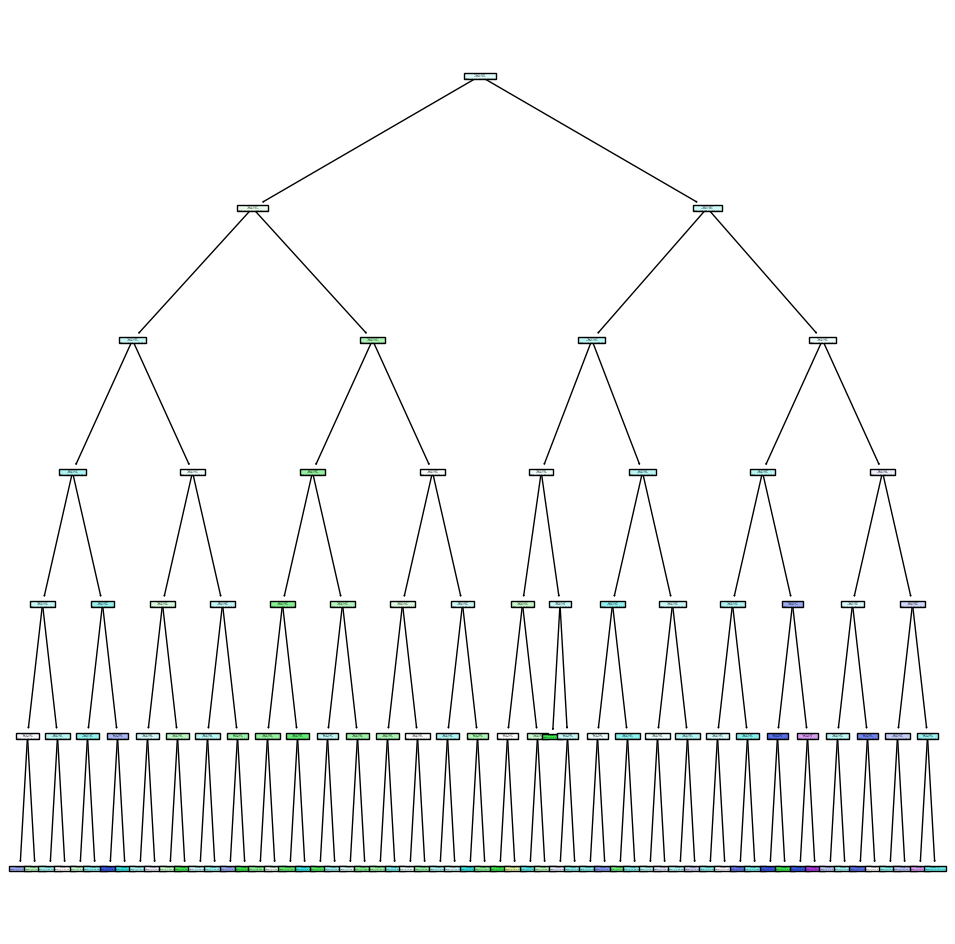

In [43]:
# 학습에 사용되었던 의사결정나무 규칙 시각화
plt.figure(figsize=(12,12))
plot_tree(decision_tree=model , filled=True) # filled : 많은 클래스가 포함되어 있는 것으로 색 표기
plt.show()

In [51]:
confusion_matrix(X_test, y_test, labels = model.classes_)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets